In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
dataset = pd.read_csv('InstaADS_LR.csv')
x = dataset.iloc[: , : -1].values
y = dataset.iloc[: , -1].values

In [9]:
print(x)
print(y)

[[   15  6334]
 [   28  6667]
 [   20 14334]
 [   21 19000]
 [   15 25334]
 [   21 19334]
 [   21 28000]
 [   25 50000]
 [   20 11000]
 [   28 21667]
 [   20 26667]
 [   26 17000]
 [   28 36000]
 [   18  6667]
 [   20 26334]
 [   21 18000]
 [   24 45000]
 [   24 29667]
 [   19 10667]
 [   14 14667]
 [   23 27667]
 [   28  7667]
 [   21 19334]
 [   19 18334]
 [   18 16000]
 [   22 26334]
 [   17  6000]
 [   25 39000]
 [   21  6667]
 [   20 29000]
 [   18 22000]
 [   25 40000]
 [   17 21000]
 [   24 22667]
 [   20 26667]
 [   19  9000]
 [   16  7667]
 [   26 37667]
 [   25  6000]
 [   27 37334]
 [   24 38667]
 [   20  5000]
 [   23  9334]
 [   23 27667]
 [   26 49667]
 [   15  7000]
 [   16 24000]
 [   20 11667]
 [   21 29667]
 [   20 28667]
 [   30 26667]
 [   31 23667]
 [   29 23667]
 [   20 30000]
 [   29 11000]
 [   17 18334]
 [   28 23667]
 [   23 49334]
 [   23 15667]
 [   16 29334]
 [   27 38334]
 [   20 39334]
 [   27 14334]
 [   27 24000]
 [   18  9334]
 [   28 15667]
 [   20  7

In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
print(x_train)
print(x_test)

[[ 0.30645937 -0.72727353]
 [-0.55054887 -1.66795146]
 [-1.40755711 -0.83799034]
 [ 0.55131887  1.5136215 ]
 [ 0.30645937 -0.47828519]
 [-1.16269761  0.24095912]
 [-1.8972761  -0.94862416]
 [ 1.04103786 -0.11866304]
 [-0.06082987 -0.72727353]
 [ 0.06159987 -0.5336436 ]
 [-0.18325962 -0.20165915]
 [-1.04026786 -0.56128131]
 [-0.18325962 -0.78263194]
 [ 0.79617836  0.01969148]
 [-0.18325962 -0.56128131]
 [ 0.30645937 -0.09102533]
 [ 2.26533534  0.8219319 ]
 [ 0.30645937 -0.50600589]
 [ 1.53075685 -1.2252502 ]
 [ 0.79617836  1.07092024]
 [ 0.91860811  1.81788525]
 [-0.55054887  1.15391635]
 [-0.18325962  0.8219319 ]
 [-1.28512736 -1.41896313]
 [ 0.79617836  0.10268759]
 [-0.79540836 -1.39124243]
 [-0.79540836 -0.97626187]
 [-0.18325962 -0.17402145]
 [-0.18325962  1.81788525]
 [ 0.18402962 -0.20165915]
 [-0.18325962 -0.50600589]
 [-0.06082987 -0.00802922]
 [-1.16269761 -1.75094758]
 [-0.06082987  0.04732919]
 [ 0.42888912  0.04732919]
 [-1.52998685 -1.66795146]
 [ 0.30645937 -0.58900201]
 

### Logistic Regression training

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Predicting

In [18]:
print(classifier.predict(sc.transform([[20,4890]]))) # Doesnt buy
print(classifier.predict(sc.transform([[54,41000]]))) # Does buy

[0]
[1]


In [21]:
y_pred = classifier.predict(x_test)
print(np.concatenate([y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)], axis=1))

[[1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

# 23 and 12 values were correctly predicted ( 23 -> We said will buy , and they bought . 12 -> we said will not but , and not bought )
# 2 and 3 were predicted incorrectly

[[23  2]
 [ 3 12]]


0.875

### Visualizing results

C:\Users\Admin\AppData\Local\Temp\ipykernel_15212\2190604770.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


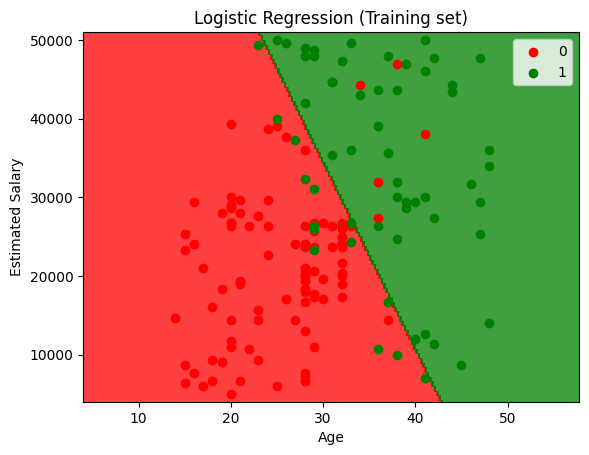

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15212\486840536.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


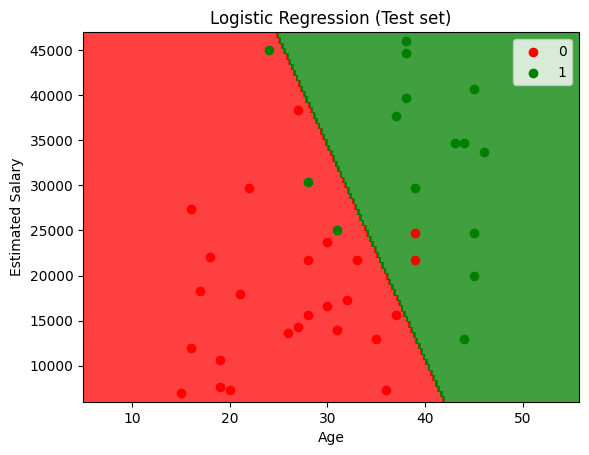

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()